In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Top%20100%20Biggest%20Restaurant%20Chains%202021/Top100Chains.csv")
train.head()

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,"$40,517",0.30%,"13,682",-1.20%,Quick Service,Burger
1,2,Starbucks,"$18,485",-13.50%,"15,337",1.90%,Quick Service,Coffee Café
2,3,Chick-fil-A,"$13,745",13.00%,"2,659",6.70%,Quick Service,Chicken
3,4,Taco Bell,"$11,294",0.00%,"6,799",0.50%,Quick Service,Mexican
4,5,Wendy's,"$10,231",4.80%,"5,881",0.50%,Quick Service,Burger


In [5]:
train.shape

(100, 8)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   RANK                        100 non-null    int64 
 1   CHAIN                       100 non-null    object
 2   2020 U.S. Sales ($000,000)  100 non-null    object
 3   YOY SALES CHANGE            100 non-null    object
 4   2020 U.S. UNITS             100 non-null    object
 5   YOY UNIT CHANGE             100 non-null    object
 6   SEGMENT                     100 non-null    object
 7   MENU CATEGORY               100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
RANK,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0


In [8]:
train.isnull().sum()

RANK                          0
CHAIN                         0
2020 U.S. Sales ($000,000)    0
YOY SALES CHANGE              0
2020 U.S. UNITS               0
YOY UNIT CHANGE               0
SEGMENT                       0
MENU CATEGORY                 0
dtype: int64

In [9]:
(train.isnull().sum()/len(train))*100

RANK                          0.0
CHAIN                         0.0
2020 U.S. Sales ($000,000)    0.0
YOY SALES CHANGE              0.0
2020 U.S. UNITS               0.0
YOY UNIT CHANGE               0.0
SEGMENT                       0.0
MENU CATEGORY                 0.0
dtype: float64

In [10]:
categoryColumns = [col for col in train.columns if train[col].dtype == "O"]

for col in categoryColumns:
    print("[",col,"]")
    print("count =",[train[col].nunique()])
    print("data =",[train[col].unique()])
    print("")
    print("")

[ CHAIN ]
count = [100]
data = [array(["McDonald's", 'Starbucks', 'Chick-fil-A', 'Taco Bell', "Wendy's",
       'Burger King', "Dunkin'", 'Subway', "Domino's",
       'Chipotle Mexican Grill', 'Sonic Drive-In', 'Pizza Hut',
       'Panera Bread', 'KFC', 'Popeyes Louisiana Kitchen', "Arby's",
       'Dairy Queen', 'Little Caesars', 'Panda Express',
       'Jack in the Box', 'Olive Garden', "Papa John's",
       'Buffalo Wild Wings', "Applebee's", "Chili's Grill & Bar",
       'Whataburger', 'Texas Roadhouse', 'IHOP', 'Outback Steakhouse',
       "Zaxby's", "Culver's", "Jimmy John's Gourmet Sandwiches",
       'Wingstop', "Hardee's", 'Cracker Barrel', 'Red Lobster', "Denny's",
       "Raising Cane's Chicken Fingers", 'Five Guys',
       "Jersey Mike's Subs", 'LongHorn Steakhouse',
       'The Cheesecake Factory', 'Bojangles', "Carl's Jr.",
       'In-N-Out Burger', 'Red Robin', 'El Pollo Loco', 'Del Taco',
       'Firehouse Subs', 'Qdoba Mexican Eats', "Papa Murphy's Pizza",
       "BJ's

In [11]:
train["2020 U.S. Sales ($000,000)"] = train["2020 U.S. Sales ($000,000)"].apply(lambda x:x.replace("$",""))
train["2020 U.S. Sales ($000,000)"] = train["2020 U.S. Sales ($000,000)"].apply(lambda x:x.replace(",",""))
train["2020 U.S. Sales ($000,000)"] = train["2020 U.S. Sales ($000,000)"].astype(int)
train["YOY SALES CHANGE"] = train["YOY SALES CHANGE"].apply(lambda x:x.replace("%",""))
train["YOY SALES CHANGE"] = train["YOY SALES CHANGE"].astype(float)

train["2020 U.S. UNITS"] = train["2020 U.S. UNITS"].apply(lambda x:x.replace(",",""))
train["2020 U.S. UNITS"] = train["2020 U.S. UNITS"].astype(float)

train["YOY UNIT CHANGE"] = train["YOY UNIT CHANGE"].apply(lambda x:x.replace("%",""))
train["YOY UNIT CHANGE"] = train["YOY UNIT CHANGE"].astype(float)

In [12]:
train.head()

,RANK,CHAIN,"2020 U.S. Sales ($000,000)",YOY SALES CHANGE,2020 U.S. UNITS,YOY UNIT CHANGE,SEGMENT,MENU CATEGORY
0,1,McDonald's,40517,0.3,13682.0,-1.2,Quick Service,Burger
1,2,Starbucks,18485,-13.5,15337.0,1.9,Quick Service,Coffee Café
2,3,Chick-fil-A,13745,13.0,2659.0,6.7,Quick Service,Chicken
3,4,Taco Bell,11294,0.0,6799.0,0.5,Quick Service,Mexican
4,5,Wendy's,10231,4.8,5881.0,0.5,Quick Service,Burger


In [13]:
train.info

<bound method DataFrame.info of     RANK                    CHAIN  2020 U.S. Sales ($000,000)  \
0      1               McDonald's                       40517   
1      2                Starbucks                       18485   
2      3              Chick-fil-A                       13745   
3      4                Taco Bell                       11294   
4      5                  Wendy's                       10231   
..   ...                      ...                         ...   
95    96            Auntie Anne's                         350   
96    97      Cold Stone Creamery                         348   
97    98              Jet's Pizza                         343   
98    99  Maggiano's Little Italy                         338   
99   100       The Capital Grille                         337   

    YOY SALES CHANGE  2020 U.S. UNITS  YOY UNIT CHANGE        SEGMENT  \
0                0.3          13682.0             -1.2  Quick Service   
1              -13.5          15337.0    

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
RANK,100.0,50.500,29.011492,1.0,25.750,50.50,75.25,100.0
"2020 U.S. Sales ($000,000)",100.0,2634.060,4926.713804,337.0,478.500,807.50,2794.00,40517.0
YOY SALES CHANGE,100.0,-8.992,18.095581,-62.0,-22.475,-7.00,4.35,31.0
2020 U.S. UNITS,100.0,1853.030,3246.237839,53.0,388.750,706.50,1779.75,22005.0
YOY UNIT CHANGE,100.0,-0.239,5.194070,-13.1,-2.900,-0.15,2.10,11.4


In [16]:
categoryColumns = [col for col in train.columns if train[col].dtype == "O"]

for col in categoryColumns:
    print("[",col,"]")
    print("count =",[train[col].nunique()])
    print("data =",[train[col].unique()])
    print("")
    print("")

[ CHAIN ]
count = [100]
data = [array(["McDonald's", 'Starbucks', 'Chick-fil-A', 'Taco Bell', "Wendy's",
       'Burger King', "Dunkin'", 'Subway', "Domino's",
       'Chipotle Mexican Grill', 'Sonic Drive-In', 'Pizza Hut',
       'Panera Bread', 'KFC', 'Popeyes Louisiana Kitchen', "Arby's",
       'Dairy Queen', 'Little Caesars', 'Panda Express',
       'Jack in the Box', 'Olive Garden', "Papa John's",
       'Buffalo Wild Wings', "Applebee's", "Chili's Grill & Bar",
       'Whataburger', 'Texas Roadhouse', 'IHOP', 'Outback Steakhouse',
       "Zaxby's", "Culver's", "Jimmy John's Gourmet Sandwiches",
       'Wingstop', "Hardee's", 'Cracker Barrel', 'Red Lobster', "Denny's",
       "Raising Cane's Chicken Fingers", 'Five Guys',
       "Jersey Mike's Subs", 'LongHorn Steakhouse',
       'The Cheesecake Factory', 'Bojangles', "Carl's Jr.",
       'In-N-Out Burger', 'Red Robin', 'El Pollo Loco', 'Del Taco',
       'Firehouse Subs', 'Qdoba Mexican Eats', "Papa Murphy's Pizza",
       "BJ's

In [17]:
train.isnull().sum()

RANK                          0
CHAIN                         0
2020 U.S. Sales ($000,000)    0
YOY SALES CHANGE              0
2020 U.S. UNITS               0
YOY UNIT CHANGE               0
SEGMENT                       0
MENU CATEGORY                 0
dtype: int64

In [18]:
(train.isnull().sum()/len(train))*100

RANK                          0.0
CHAIN                         0.0
2020 U.S. Sales ($000,000)    0.0
YOY SALES CHANGE              0.0
2020 U.S. UNITS               0.0
YOY UNIT CHANGE               0.0
SEGMENT                       0.0
MENU CATEGORY                 0.0
dtype: float64

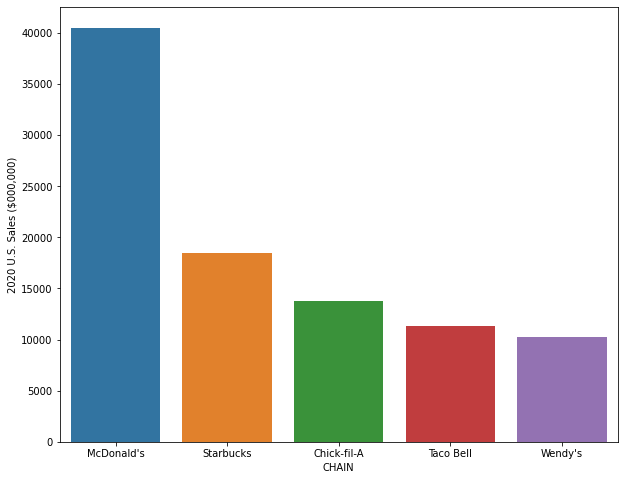

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(data=train[:5], x="CHAIN", y ="2020 U.S. Sales ($000,000)")
plt.show()